In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
ls 'drive/My Drive/10_Predictive/3_Project/004_NeuralNet_FeatureImportance'

Folds5x2_pp.xlsx  NeuralNet_FeatImportance.ipynb  README.md


In [12]:
### READ DATA ###

df = pd.read_excel('drive/My Drive/10_Predictive/3_Project/004_NeuralNet_FeatureImportance/Folds5x2_pp.xlsx')
print(df.shape)
df.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


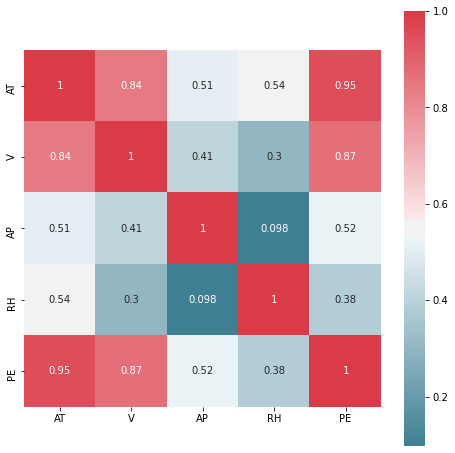

In [13]:
### PLOT CORRELATION MATRIX ###

plt.figure(figsize=(8,8))
train_size = int(df.shape[0]*0.8)
corr_matrix = df.iloc[:train_size,:].corr().abs()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)

In [0]:
### TRAIN TEST SPLIT ###

X, y = ['AT','V','AP','RH'], ['PE']
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size = 0.2, random_state = 42)

# GRADIENT BOOSTING FEATURE IMPORTANCES

In [15]:
### FIT GRADIENTBOOSTING ###

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
### PREDICTION ERROR ON TEST DATA ###

mean_absolute_error(y_test, gb.predict(X_test))

2.9475457550299557

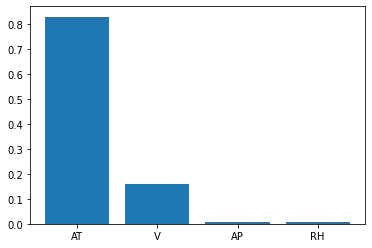

In [17]:
### FEATURE IMPORTANCES REPORT ###

plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['AT','V','AP','RH'])
np.set_printoptions(False)

# PERMUTATION IMPORTANCE

In [0]:
### SCALE DATA FOR NN ###

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [0]:
### UTILITY FUNCTIONS TO SCALE TARGET ###

mean_train = y_train.mean().values
std_train = y_train.std().values

def scale_target(y, mean, std):
    return np.asarray((y - mean)/std)

def reverse_target(pred, mean, std): 
    return np.asarray(pred*std + mean)

In [20]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


### DEFINE NN STRUCTURE ###

inp = Input(shape=(scaled_train.shape[1],))
x = Dense(128, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
out = Dense(1)(x)
model = Model(inp, out)

model.compile(optimizer='adam', loss='mse')
model.fit(scaled_train, scale_target(y_train, mean_train, std_train) , epochs=100, batch_size=128 ,verbose=2)

Epoch 1/100
60/60 - 0s - loss: 0.2498
Epoch 2/100
60/60 - 0s - loss: 0.0659
Epoch 3/100
60/60 - 0s - loss: 0.0619
Epoch 4/100
60/60 - 0s - loss: 0.0607
Epoch 5/100
60/60 - 0s - loss: 0.0604
Epoch 6/100
60/60 - 0s - loss: 0.0596
Epoch 7/100
60/60 - 0s - loss: 0.0592
Epoch 8/100
60/60 - 0s - loss: 0.0589
Epoch 9/100
60/60 - 0s - loss: 0.0587
Epoch 10/100
60/60 - 0s - loss: 0.0584
Epoch 11/100
60/60 - 0s - loss: 0.0582
Epoch 12/100
60/60 - 0s - loss: 0.0584
Epoch 13/100
60/60 - 0s - loss: 0.0579
Epoch 14/100
60/60 - 0s - loss: 0.0574
Epoch 15/100
60/60 - 0s - loss: 0.0575
Epoch 16/100
60/60 - 0s - loss: 0.0579
Epoch 17/100
60/60 - 0s - loss: 0.0573
Epoch 18/100
60/60 - 0s - loss: 0.0570
Epoch 19/100
60/60 - 0s - loss: 0.0573
Epoch 20/100
60/60 - 0s - loss: 0.0567
Epoch 21/100
60/60 - 0s - loss: 0.0569
Epoch 22/100
60/60 - 0s - loss: 0.0567
Epoch 23/100
60/60 - 0s - loss: 0.0571
Epoch 24/100
60/60 - 0s - loss: 0.0568
Epoch 25/100
60/60 - 0s - loss: 0.0563
Epoch 26/100
60/60 - 0s - loss: 0.

In [21]:
### PREDICTION ERROR ON TEST DATA ###

real_pred = reverse_target(model.predict(scaled_test).ravel(), mean_train, std_train) 
MAE = mean_absolute_error(y_test, real_pred)

MAE

3.0051823874760792

In [22]:
### COMPUTE PERMUTATION AND SCORING ###

os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

final_score = []
shuff_pred = []

for i,col in enumerate(X_test.columns):

    # shuffle column
    shuff_test = scaled_test.copy()
    shuff_test[:,i] = np.random.permutation(shuff_test[:,i])
    
    # compute score
    score = mean_absolute_error(y_test, reverse_target(model.predict(shuff_test).ravel(), mean_train, std_train))
    shuff_pred.append(reverse_target(model.predict(shuff_test).ravel(), mean_train, std_train))
    final_score.append(score)
    
final_score = np.asarray(final_score)
final_score

array([17.,  6.,  4.,  4.])

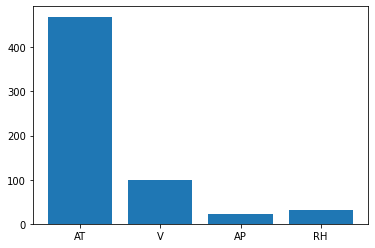

In [23]:
### PERMUTATION IMPORTANCE REPORT ###

plt.bar(range(X_train.shape[1]), (final_score - MAE)/MAE*100)
plt.xticks(range(X_train.shape[1]), ['AT','V','AP','RH'])
np.set_printoptions(False)

# EXPLAIN CASUALITY

In [24]:
### SIMULATE MEAN DIFFERENCE TEST AMONG PREDICTIONS ###

os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

id_ = 0

merge_pred = np.hstack([shuff_pred[id_], real_pred])
observed_diff = abs(shuff_pred[id_].mean() - merge_pred.mean())
extreme_values = []
sample_d = []

for _ in range(10000):
    sample_mean = np.random.choice(merge_pred, size=shuff_pred[id_].shape[0]).mean()
    sample_diff = abs(sample_mean - merge_pred.mean())
    sample_d.append(sample_diff)
    extreme_values.append(sample_diff >= observed_diff)
    
np.sum(extreme_values)/10000

0.058

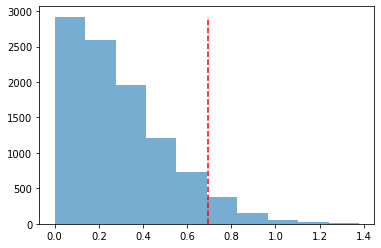

In [25]:
### PLOT MEAN DIFFERENCE DISTRIBUTIONS ###

y, x, _ = plt.hist(sample_d, alpha=0.6)
plt.vlines(observed_diff, 0,max(y), colors='red', linestyles='dashed')